In [1]:


pip install facebook-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 15.8 MB/s eta 0:00:00
  Created wheel for demjson3: filename=demjson3-3.0.6-py3-none-any.whl size=75297 sha256=16bae871f465a40949a9b579c941dacdd432743dbc19315d17dde9952b5d02a3
  Stored in directory: /root/.cache/pip/wheels/bd/5d/ed/60c261589c275c950ad7f87a906849e0aa70c0f1f9a5110a39
  Created wheel for bs4: filename

In [2]:
from facebook_scraper import get_posts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Chuan bi cac truong du lieu
FANPAGE_LINK ="UITconfess"
FOLDER_PATH = "/content/drive/MyDrive/FacebookCrawler"
COOKIE_PATH = "/content/drive/MyDrive/FacebookCrawler/facebook.com_cookies.txt"

PAGES_NUMBER = 10 # số trang cần cào

In [5]:
# Crawl tat ca thong tin cac post cua UITconfess
post_list = []
for post in get_posts(FANPAGE_LINK, 
                    options={"comments": True, "reactions": True, "allow_extra_requests": True}, 
                    extra_info=True, pages=10, cookies=COOKIE_PATH):
    post_list.append(post)

/usr/local/lib/python3.9/dist-packages/facebook_scraper/facebook_scraper.py:912: UserWarning: Facebook says 'Unsupported Browser'
  warnings.warn(f"Facebook says 'Unsupported Browser'")
/usr/local/lib/python3.9/dist-packages/facebook_scraper/facebook_scraper.py:855: UserWarning: Facebook language detected as en_GB - for best results, set to en_US
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/dateparser/freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
/usr/local/lib/python3.9/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/ufi/reaction/profile/browser/fetch/?ft_ent_identifier=pfbid0a8o81W3TRfxqnN21kL

In [6]:
#Tong so bai post Crawl
len(post_list)


57

In [9]:
post_df_full = pd.DataFrame(columns = [])

for post in post_list:
    post_entry = post
    fb_post_df = pd.DataFrame.from_dict(post_entry, orient='index')
    fb_post_df = fb_post_df.transpose()
    post_df_full = post_df_full.append(fb_post_df)

<ipython-input-9-9fd688a00e62>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)
<ipython-input-9-9fd688a00e62>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)
<ipython-input-9-9fd688a00e62>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)
<ipython-input-9-9fd688a00e62>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)
<ipython-input-9-9fd688a00e62>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [10]:
# 10 posts dau tien
post_df_full.head(10)
     

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,170701979233453,"#66\nXin chào các bạn đang học UIT nha, mình l...","#66\nXin chào các bạn đang học UIT nha, mình l...",,None,2023-04-08 06:20:51,1680934851,None,https://scontent-frt3-2.xx.fbcdn.net/m1/v/t6/A...,[],...,https://www.facebook.com/UITconfess/posts/1707...,"{'like': 40, 'love': 2, 'haha': 15, 'care': 1,...",59,None,101505646153767,None,None,[],False,2023-04-16 01:29:52.503740
0,169379616032356,#65\nCho em hỏi điểm xét tuyển phương thức ưu ...,#65\nCho em hỏi điểm xét tuyển phương thức ưu ...,,None,2023-04-06 08:20:37,1680769237,None,https://scontent-frt3-2.xx.fbcdn.net/m1/v/t6/A...,[],...,https://www.facebook.com/UITconfess/posts/1693...,{'like': 18},18,None,101505646153767,None,None,[],False,2023-04-16 01:29:59.783323
0,169379016032416,#62\nNho anh Nam qua di mat! Anh nhan tin cho ...,#62\nNho anh Nam qua di mat! Anh nhan tin cho ...,THEGIOIDIDONG.COM\nXiaomi Redmi Note 8 64GB | ...,None,2023-04-06 08:19:19,1680769159,None,https://external-frt3-2.xx.fbcdn.net/emg1/v/t1...,[],...,https://www.facebook.com/UITconfess/posts/1693...,"{'like': 8, 'haha': 1, 'sad': 1}",10,None,101505646153767,None,None,[],False,2023-04-16 01:30:01.727893
0,169377502699234,"#62\n""Xin phép ad duyệt bài này giúp em ạ.\n\n...","#62\n""Xin phép ad duyệt bài này giúp em ạ.\n\n...",,None,2023-04-06 08:15:32,1680768932,None,https://scontent-frt3-2.xx.fbcdn.net/m1/v/t6/A...,[],...,https://www.facebook.com/UITconfess/posts/1693...,"{'like': 38, 'love': 1, 'haha': 5, 'wow': 4, '...",66,None,101505646153767,None,None,[],False,2023-04-16 01:30:06.049439
0,169376876032630,#60\nem có để quên 1 tai nghe giống vậy ở trườ...,#60\nem có để quên 1 tai nghe giống vậy ở trườ...,DRIVE.GOOGLE.COM\nIMG_4152.JPG,None,2023-04-06 08:14:24,1680768864,None,https://scontent-frt3-2.xx.fbcdn.net/m1/v/t6/A...,[],...,https://www.facebook.com/UITconfess/posts/1693...,"{'like': 8, 'haha': 3}",11,None,101505646153767,None,None,[],False,2023-04-16 01:30:11.859651
0,166196723017312,"#59\nHôm 1/4/2023, mình gặp được bạn Huyền Tra...","#59\nHôm 1/4/2023, mình gặp được bạn Huyền Tra...",,None,2023-04-01 15:31:18,1680363078,None,https://scontent-frt3-2.xx.fbcdn.net/m1/v/t6/A...,[],...,https://www.facebook.com/UITconfess/posts/1661...,"{'like': 19, 'haha': 8, 'sad': 1}",28,None,101505646153767,None,None,[],False,2023-04-16 01:30:14.168579
0,166196139684037,#58\nAi đó khuyên bạn H*** khoa KHMT sống khiê...,#58\nAi đó khuyên bạn H*** khoa KHMT sống khiê...,,None,2023-04-01 15:30:20,1680363020,None,https://scontent-frt3-2.xx.fbcdn.net/m1/v/t6/A...,[],...,https://www.facebook.com/UITconfess/posts/1661...,"{'like': 33, 'haha': 1, 'sad': 13}",47,None,101505646153767,None,None,[],False,2023-04-16 01:30:21.063048
0,166195543017430,"#57\nMọi người ơi, mình là sinh viên trường kh...","#57\nMọi người ơi, mình là sinh viên trường kh...",,None,2023-04-01 15:29:14,1680362954,None,https://scontent-frt3-2.xx.fbcdn.net/m1/v/t6/A...,[],...,https://www.facebook.com/UITconfess/posts/1661...,"{'like': 15, 'sad': 2}",17,None,101505646153767,None,None,[],False,2023-04-16 01:30:23.402551
0,165854103051574,#54\nBạn Nguyễn Vân Anh lớp N13 có người ấy ch...,#54\nBạn Nguyễn Vân Anh lớp N13 có người ấy ch...,,None,2023-04-01 03:53:55,1680321235,None,None,[],...,https://www.facebook.com/UITconfess/posts/1658...,"{'like': 19, 'sad': 3}",22,None,101505646153767,None,None,[],False,2023-04-16 01:30:27.221055
0,165853756384942,"#52\nEm chào mọi người,\nEm đang là sinh viên ...","#52\nEm chào mọi người,\nEm đang là sinh viên ...",,None,2023-04-01 03:53:01,1680321181,None,https://scontent-frt3-2.xx.fbcdn.net/m1/v/t6/A...,[],...,https://www.facebook.com/UITconfess/posts/1658...,"{'like': 15, 'sad': 1}",16,None,101505646153767,None,None,[],False,2023-04-16 01:30:31.171746


In [49]:
# In full comment cua tat ca cac posts
numberOfComent = [len(post_df_full.iloc[i]['comments_full']) for i in range(len(post_df_full))]
print(sum(numberOfComent))
for i in range(len(post_df_full)):
  print(post_df_full.iloc[i]['comments_full'])


138
[{'comment_id': '944215556762057', 'comment_url': 'https://facebook.com/944215556762057', 'commenter_id': '100082089197796', 'commenter_url': 'https://facebook.com/pxquang.2002?eav=AfamVf58Ftfzvmpt6Wcna-KExBwVBsCW6DtlxPGStl5id0tU_hIn_9ns8b_55J_Wog0&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Phan Xuân Quang', 'commenter_meta': None, 'comment_text': '#67 xu hướng chung hiện tại là ưu tiên cho điểm ĐGNL, nên nếu trường giảm chi tiêu còn 110 mà tăng tỉ lệ xét tuyển bằng điểm ĐGNL thì không khác năm ngoái mấy hoặc thậm chí có khi điểm chuẩn sẽ giảm đôi chút. Bạn có thể mong đợi điểm chuẩn năm nay chênh so với năm ngoái khoảng 20 điểm trở lại, tức là trong khoảng ước 790 đến 830.\nBạn có thể thi đợt hai là cố gắng đạt khoảng 830-850 là có thể yên tâm khoảng 69% nằm trong diện an toàn :V', 'comment_time': datetime.datetime(2023, 4, 9, 0, 0), 'comment_image': 'https://scontent-frt3-2.xx.fbcdn.net/m1/v/t6/An_UvxJXg9tdnLU3Y5qjPi0200MLilhzPXUgxzGjQzUMaNcmjdZA6anyrngvkdub33NZz

In [50]:
#Lay tat ca comments tu post 1 
for i in range(len(post_df_full.iloc[0]['comments_full'])):
  print(post_df_full.iloc[0]['comments_full'][i]['comment_text'])


#67 xu hướng chung hiện tại là ưu tiên cho điểm ĐGNL, nên nếu trường giảm chi tiêu còn 110 mà tăng tỉ lệ xét tuyển bằng điểm ĐGNL thì không khác năm ngoái mấy hoặc thậm chí có khi điểm chuẩn sẽ giảm đôi chút. Bạn có thể mong đợi điểm chuẩn năm nay chênh so với năm ngoái khoảng 20 điểm trở lại, tức là trong khoảng ước 790 đến 830.
Bạn có thể thi đợt hai là cố gắng đạt khoảng 830-850 là có thể yên tâm khoảng 69% nằm trong diện an toàn :V
#67 sợ hay ko sợ thì kết quả cũng chỉ có 1 thoi em, nên cố gắng thi đợt 2 hết sức mình vào, nếu thực sự thích thì mình cứ theo đuổi tới cùng luôn, ít nhất bản thân mình ko thấy hối hận. 😉
Tập trung vào hiện tại nke em, bỏ lỡ thì tiếc lắm đoá. Cố lênh nka🤌
#67 anh ủng hộ thi lại đợt 2 cải thiện thêm điểm chứ điểm chênh 10-20đ so với năm ngoái nguy hiểm lắm
🥤☕ TRÀ SỮA ( GREEN TEA ) MỚI MỞ CẦN:
📌Chị cần 3 bạn - THÁI ĐỘ TỐT + Chịu Khó và lịch sự nhé:
Phụ chị bán TRÀ SỮA và đồ uống
Độ tuổi: 18t - 23t
⏲️Thời gian: ca sáng 7h30 - 11h30
Ca chiều 13h - 17h
Ca tối

In [8]:
# Cac truong du lieu cua 1 post
x = post_list[0].keys()
x

dict_keys(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time', 'timestamp', 'image', 'image_lowquality', 'images', 'images_description', 'images_lowquality', 'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height', 'video_id', 'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments', 'shares', 'post_url', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'available', 'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count', 'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live', 'fetched_time'])

In [52]:
# Tao file .xlsx luu lai cac posts
path=FOLDER_PATH + "/" + FANPAGE_LINK + ".xlsx"
post_df_full.to_excel(FOLDER_PATH +"/" + FANPAGE_LINK + ".xlsx", index=False)
print(path)

/content/drive/MyDrive/FacebookCrawler/UITconfess.xlsx


In [53]:
# Tao file .xlsx chi luu lai post_id, text_post va comments
path=FOLDER_PATH + "/" + 'comments_only' + ".xlsx"
post_df_full[['post_id', 'text', 'comments_full']].to_excel(FOLDER_PATH +"/" + 'comments_only' + ".xlsx", index=False)
print(path)

/content/drive/MyDrive/FacebookCrawler/comments_only.xlsx


In [51]:
#Drop None column
post_df_full = post_df_full.dropna(subset=['reactions'])


In [15]:
#Tim post duoc yeu thich hay khong
def get_FavoriteAndBoring_posts(df):
  f_post = []
  b_post = []
  for i in range(len(df)):
    if (df.iloc[i]['reaction_count'] >= 15): 
      f_post.append(df.iloc[i]['text'])
    else: b_post.append(df.iloc[i]['text'])
  return f_post, b_post

In [16]:
f_posts ,b_posts = get_FavoriteAndBoring_posts(post_df_full)

In [17]:
# In cac posts co hon 15 like
for i in f_posts:
  print(i)
  print()

#66
Xin chào các bạn đang học UIT nha, mình là sinh viên một trường X giấu tên (ở quận 5), tuần rồi mình với bạn mình có lên kèo đi chơi quanh khu làng đại học, ùiii mình đi tầm 4-5 trường ở làng đại học rồi, mà mình ấn tượng nhất là UIT luôn í, nói chính xác hơn nữa là ấn tưởng các bạn nam trong trường, nên tuần nào mình cũng vượt hơn 25km ngồi xeSee More bus để tới UIT ngắm troaiii, mấy bạn trong trường ơi, có thể cho mình một vài tips tuyệt đỉnh để kua trai UIT khumm ạ. Mình xin cảm ơn nhiềuuu lắm.
-\-\-\-\-\-\-
#67
Chào các anh chị, em là 2k5, em có dự định thi vô ngành CNTT Việt - Nhật của trường. Đợt thi đánh giá năng lực vừa rồi em được 792đ, nếu cộng thêm điểm kv2 em sẽ được 812đ. Theo em tìm hiểu thì điểm chuẩn năm ngoái của ngành này là 805đ và lấy 120 chỉ tiêu. Nhưng em tìm hiểu được năm nay trường chỉ lấy 110 chỉ tiêu. Em lo sợ là điểm chuẩn năm nay sẽ tăng hoặc tăng nhẹ 10đ thôi là em rớt rồi😓. Các anh chị nghĩ là điểm chuẩn năm nay sẽ tăng hay giảm ạ chứ em sợ không đậu l

[59, 18, 10, 66, 11, 28, 47, 17, 22, 16, 30, 20, 16, 34, 42, 28, 31, 29, 37, 74, 18, 42, 13, 77, 31, 29, 52, 45, 17, 88, 13, 14, 29, 28, 37, 25, 20, 8, 25, 42, 25, 8, 32, 24, 15, 13, 4, 12, 24, 14, 4, 12, 11, 12, 11, 12]


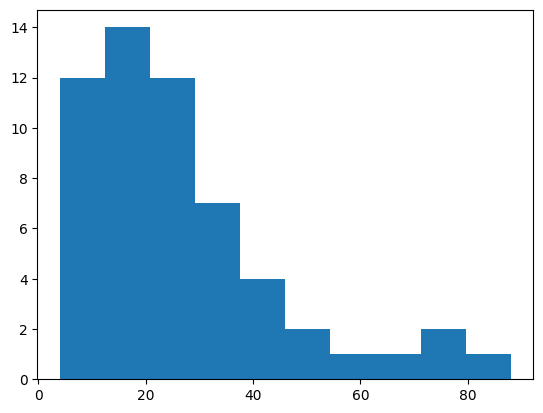

In [18]:
# Tao histogram dua tren so reaction cua cac posts
import matplotlib.pyplot as plt
import numpy as np

x = list(post_df_full[:]['reaction_count'])
print(x)
plt.hist(x)
plt.show()


In [19]:
# tinh mode median, mean cac posts
print(post_df_full[['reaction_count']].median())
print()
print(post_df_full[['reaction_count']].mode())
print()
print(post_df_full[['reaction_count']].mean())

reaction_count    24.0
dtype: float64

  reaction_count
0             12

reaction_count    27.160714
dtype: float64
